In [120]:
from pstats import SortKey
from numpy import *
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# veriyi yukle
letters = pd.read_csv('C:/Users/ilterhan/odev1/letter_recognition.data')

# veriyi egitim ve test olarak ayir
train = letters.head(16000)
test = letters.tail(4000)
"""
# bazi bilgileri kontrol amacli bastir
print(train.Letter)
print(train.values[0:10,:])
data = train.values
L = train.Letter.values
print(test.values[0:10,:])

# egitim verisini grupla ve oncul olasılıkları P(letter) hesapla
letter_num =  train.groupby('Letter')['Letter'].count()
print(letter_num)
"""
letter_num =  train.groupby('Letter')['Letter'].count()
letter_test =  test.groupby('Letter')['Letter'].count()
#P(letter)
#A harfinin ilk columnundaki sayilari bulan kod
df=pd.DataFrame(index=train.Letter,data=train.values)




In [121]:
df=df.iloc[pd.Categorical(df.index).argsort()]
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
Letter,,,,,,,,,,,,,,,,,
A,A,4,9,6,7,4,8,2,1,2,6,2,8,2,7,3,6
A,A,3,2,6,4,2,8,2,2,2,6,2,7,3,7,3,7
A,A,4,11,6,8,3,9,3,3,3,8,1,9,3,6,3,9
A,A,2,5,4,4,2,8,3,2,2,8,2,8,2,6,2,7
A,A,3,8,5,6,3,12,2,3,2,10,2,9,2,6,2,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Z,Z,2,3,3,2,2,7,7,5,9,6,6,9,1,8,7,8
Z,Z,4,8,6,6,4,7,9,2,9,11,7,6,1,8,6,6
Z,Z,4,8,5,6,5,8,8,3,8,7,7,7,0,8,11,8


In [122]:
#df_new = df.rename(columns={'A': 'Col_1'}, index={'ONE': 'Row_1'})
df = df.rename(index={'A': 0,'B': 1,'C': 2,'D': 3,'E': 4,'F': 5,'G': 6,'H': 7,'I': 8,'J': 9,'K': 10,'L': 11,'M': 12,
                     'N': 13,'O': 14,'P': 15,'Q': 16,'R': 17,'S': 18,'T': 19,'U': 20,'V': 21,'W': 22,'X': 23,'Y': 24,'Z': 25})

In [123]:
del df[df.columns[0]]

In [124]:
df.columns = [0, 1, 2, 3,4,5,6,7,8,9,10,11,12,13,14,15]

In [125]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
Letter,,,,,,,,,,,,,,,,
0,4,9,6,7,4,8,2,1,2,6,2,8,2,7,3,6
0,3,2,6,4,2,8,2,2,2,6,2,7,3,7,3,7
0,4,11,6,8,3,9,3,3,3,8,1,9,3,6,3,9
0,2,5,4,4,2,8,3,2,2,8,2,8,2,6,2,7
0,3,8,5,6,3,12,2,3,2,10,2,9,2,6,2,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25,2,3,3,2,2,7,7,5,9,6,6,9,1,8,7,8
25,4,8,6,6,4,7,9,2,9,11,7,6,1,8,6,6
25,4,8,5,6,5,8,8,3,8,7,7,7,0,8,11,8


In [126]:
x = [[[0 for col in range(16)]for row in range(16)] for x in range(26)]

In [127]:
for harf in range(0,26):
    for f in range(0,16):
        for value in range(0,16):
            x[harf][f][value]=(sum(df.loc[harf][f]==value)+1)/(sum(letter_num[harf])+16)
            

In [128]:
x[3][4][5] #p(f5= 5|D) olasiligi

0.154434250764526

In [129]:
basit_olasilik=[]
for i in range(0,26):
    basit_olasilik.append(sum(letter_num[i])/sum(letter_num))

In [130]:
#basit_olasilik[0] == p(A)
#basit_olasilik

In [131]:
df_test=pd.DataFrame(index=test.Letter,data=test.values)
del df_test[df_test.columns[0]]

In [132]:
df_test = df_test.rename(index={'A': 0,'B': 1,'C': 2,'D': 3,'E': 4,'F': 5,'G': 6,'H': 7,'I': 8,'J': 9,'K': 10,'L': 11,'M': 12,
                     'N': 13,'O': 14,'P': 15,'Q': 16,'R': 17,'S': 18,'T': 19,'U': 20,'V': 21,'W': 22,'X': 23,'Y': 24,'Z': 25})

In [133]:
df_test.columns = [0, 1, 2, 3,4,5,6,7,8,9,10,11,12,13,14,15]

In [134]:
df_test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
Letter,,,,,,,,,,,,,,,,
20,4,10,6,7,9,9,6,4,3,6,7,7,9,8,5,6
13,6,9,8,4,3,8,7,3,4,13,5,8,6,8,0,8
21,6,9,8,8,10,7,7,5,4,7,6,8,7,9,7,10
8,5,6,6,4,3,7,6,2,7,7,6,9,0,9,4,8
13,5,9,7,6,4,9,7,3,5,10,4,6,5,8,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
2,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4


In [135]:
arr=[]
for j in range(0,4000):
    for i in range(0,16):
        arr.append(sum(df_test.iloc[j][i]))
        

In [136]:
np.reshape(arr, (4000, 16))

array([[ 4, 10,  6, ...,  8,  5,  6],
       [ 6,  9,  8, ...,  8,  0,  8],
       [ 6,  9,  8, ...,  9,  7, 10],
       ...,
       [ 6,  9,  6, ..., 12,  2,  4],
       [ 2,  3,  4, ...,  9,  5,  8],
       [ 4,  9,  6, ...,  7,  2,  8]])

In [137]:
arr=np.reshape(arr, (4000, 16))

In [138]:
arr[0]

array([ 4, 10,  6,  7,  9,  9,  6,  4,  3,  6,  7,  7,  9,  8,  5,  6])

In [139]:
ar_cevap=[]
for i in range(0,4000):
    ar_cevap.append(df_test.index.values[i])

In [140]:

def calc(data):
    guesses = []
    for row in range(0,4000):
        curr_row = data[row]
        probs=[]    
        for harf in range(0,26):
            prod = 1
            prod *= basit_olasilik[harf]
            for f in range(0,16):
                if x[harf][f][curr_row[f]]!=0:
                    prod *= x[harf][f][curr_row[f]]
            probs.append(prod)
        guesses.append(probs.index(max(probs)))
    return guesses
    #probs.index(max(probs))

In [141]:
guesses=calc(arr)

In [142]:
def successrate(test,guesses):
    success = 0
    for i in range(0,4000):
        if test[i] == guesses[i]:
            success += 1
    print(success/4000)

In [143]:
successrate(ar_cevap,guesses)

0.72375


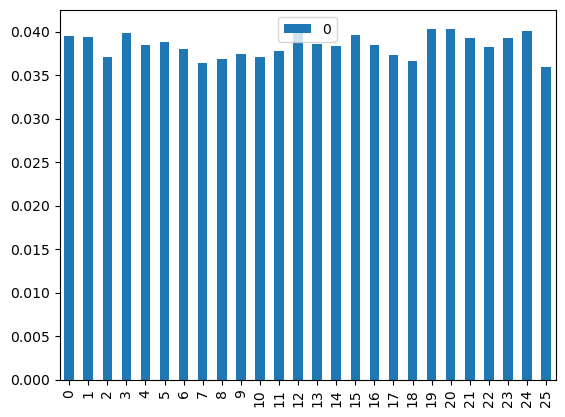

In [144]:
df_bo=pd.DataFrame(basit_olasilik)
df_bo.plot.bar()
plt.show()

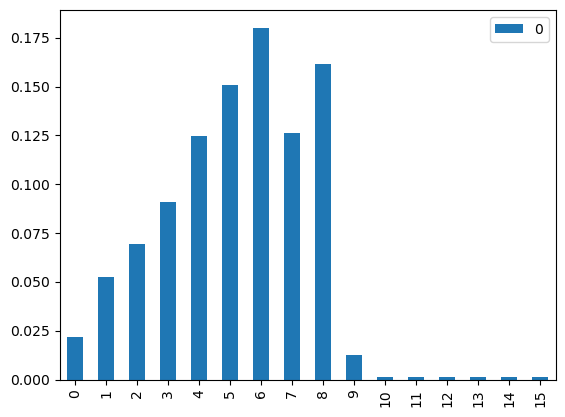

In [145]:
df_so=pd.DataFrame(x[0][3][:])
df_so.plot.bar()
plt.show()
#x[0][3][:] a nin f4 deki 0'dan 15 e olan valuelari

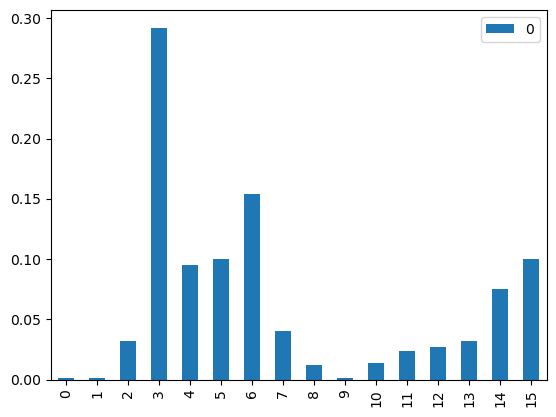

In [148]:
df_so2=pd.DataFrame(x[7][7][:]) #h nin f8 deki 0 dan 15 e olan valuelari
df_so2.plot.bar()
plt.show()


In [149]:
from sklearn.metrics import confusion_matrix
sklearn.metrics.confusion_matrix(ar_cevap, guesses)

array([[131,   1,   0,   2,   1,   0,   4,   2,   0,   0,   0,   1,   0,
          3,   1,   0,   4,   2,   0,   1,   0,   0,   2,   1,   0,   0],
       [  0, 101,   0,   3,   0,   0,   2,   1,   2,   0,   3,   0,   3,
          3,   1,   0,   0,  11,   2,   0,   0,   0,   1,   2,   0,   1],
       [  0,   0,  99,   0,   4,   0,   8,   0,   4,   0,  12,   0,   2,
          2,   0,   0,   9,   0,   0,   0,   1,   0,   0,   0,   0,   1],
       [  0,  13,   0, 123,   0,   0,   2,   3,   2,   2,   0,   0,   1,
          0,  11,   1,   0,   7,   1,   0,   0,   0,   0,   1,   0,   0],
       [  0,   2,   2,   1,  95,   1,  10,   1,   3,   0,   7,   0,   1,
          1,   0,   0,   8,   1,   5,   2,   1,   0,   0,   8,   0,   3],
       [  0,   3,   0,   5,   3, 123,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   7,   2,   3,   3,   0,   0,   0,   2,   2,   0,   0],
       [  0,   2,   2,   1,   4,   0, 119,   1,   0,   1,   2,   0,   4,
          0,   2,   0,  11,   4,   4,   0,   